In [4]:
## Viga Contínua

%load_ext autoreload
%autoreload
%reset -f

from src import Node as nd
from src import Bar as bar
from src import Beam as vg
from src import Apoio as ap
from src import CargaPontual as cp
from src import CargaDistribuida as cd
from src import Modelo as md
# from src import Modelo as md

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
## Propriedades do material

mod_elast = 25e9
b = 0.2
h = 0.4
area = b * h
inercia = b * h ** 3 / 12

## Propriedades gerais da viga:

q = -10e3
L = 5

In [6]:
nd.Node.clear_list_nodes()
bar.Barra.clear_list_bars()

## Definindo os nós:

node1 = nd.Node(0, 0)
node2 = nd.Node(0.5, 0)
node3 = nd.Node(1, 0)
node4 = nd.Node(1.5, 0)
node5 = nd.Node(2, 0)
node6 = nd.Node(2.5, 0)
node7 = nd.Node(3, 0)
node8 = nd.Node(3.5, 0)
node9 = nd.Node(4, 0)
node10 = nd.Node(4.5, 0)
node11 = nd.Node(5, 0)

## Definindo os apoios:

apoio1 = ap.Apoio([0, 0, 1], node = node3)
apoio2 = ap.Apoio([0, 0, 1], node = node9)

## Definindo as barras:

# list_bars = []

for idx in range(len(nd.Node.list_nodes) - 1):
    bar_temp = bar.Barra(mod_elast, area, inercia, nd.Node.list_nodes[idx], nd.Node.list_nodes[idx + 1])
    # list_bars.append(bar_temp)

## Definindo as cargas:

# list_cargas = []

for idx, barra in enumerate(bar.Barra.list_bars):
    carga_temp = cd.CargaUniforme(0, q, barra)
    barra.lista_cargas.append(carga_temp)
    # list_cargas.append(carga_temp)

beam_teste = vg.Beam(lista_barras = bar.Barra.list_bars)
beam_teste.solver_viga()
# beam_teste.plot_displacement()
# beam_teste.plot_axial_force()
# beam_teste.plot_shear_force()
# beam_teste.plot_bending_moment()
beam_teste.export_data(name = 'viga_teste')

df_teste = pd.DataFrame(beam_teste.dict_data)
display(df_teste.loc[(df_teste['x'] == 0) | (df_teste['x'] == 1) | (df_teste['x'] == 2.5) | (df_teste['x'] == 4) | (df_teste['x'] == 5)])

AttributeError: 'Node' object has no attribute 'z'

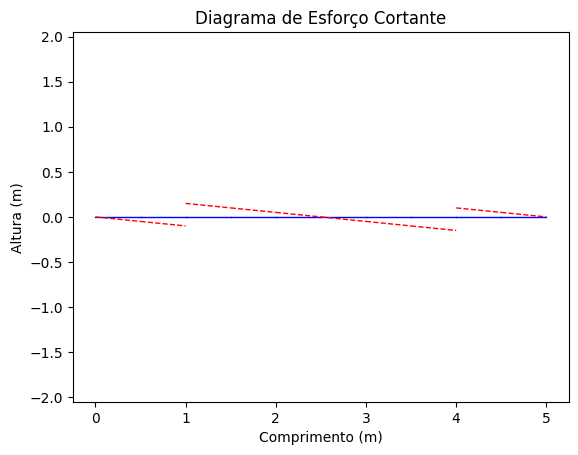

In [ ]:
beam_teste.plot_shear_force()

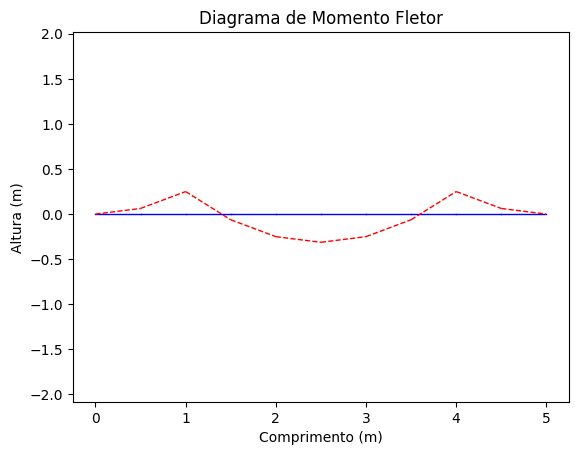

In [ ]:
beam_teste.plot_bending_moment()

In [ ]:
vars(beam_teste.lista_barras[0])

{'lista_cargas': [<src.CargaDistribuida.CargaUniforme at 0x2ed9febf050>],
 'list_nodes': [<src.Node.Node at 0x2ed99614890>,
 'theta': 0,
 'ke_': Matrix([
 [ 4000000000.0,             0,                0, -4000000000.0,             0,                0],
 [            0,  2560000000.0,      640000000.0,             0, -2560000000.0,      640000000.0],
 [            0,   640000000.0, 213333333.333333,             0,  -640000000.0, 106666666.666667],
 [-4000000000.0,             0,                0,  4000000000.0,             0,                0],
 [            0, -2560000000.0,     -640000000.0,             0,  2560000000.0,     -640000000.0],
 [            0,   640000000.0, 106666666.666667,             0,  -640000000.0, 213333333.333333]]),
 'T': Matrix([
 [1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 1]]),
 'A': 0.08000000000000002,
 'E': 25000000000.0,
 'L': 0.5,
 'I': 0.001066666666666667,
 'ke': Matrix([
 [0,

In [ ]:
vars(beam_teste.lista_barras[0].lista_cargas[0])

{'type': 'uniforme',
 'qx': 0,
 'qy': -10000.0,
 'x0': 0,
 'y0': 0,
 'x1': 0.5,
 'y1': 0,
 'length': 0.5,
 'theta': 0,
 'lx': 0.5,
 'ly': 0.0}

In [ ]:
nd.Node.clear_list_nodes()
bar.Barra.clear_list_bars()

viga = md.Modelo()

## Definindo os nós:

viga.criar_node(0, 0)